Занятие 3. Иерархическая кластеризация.
=============

Полезные ссылки:
* https://docs.scipy.org/doc/scipy-0.14.0/reference/cluster.hierarchy.html
* https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/
* http://scikit-learn.org/stable/modules/clustering.html

In [3]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

# import os

In [22]:
# import os

Пример 1. Beverage
--------

In [1]:
# os.chdir("c:/aaa/temp_py/Shad_Python_02_2/1_beverage/")


In [5]:
df = pd.read_csv("beverage_r.csv", sep=";", index_col='numb.obs')

In [8]:
df.head()


,COKE,D_COKE,D_PEPSI,D_7UP,PEPSI,SPRITE,TAB,SEVENUP
numb.obs,,,,,,,,
1,1,0,0,0,1,1,0,1
2,1,0,0,0,1,0,0,0
3,1,0,0,0,1,0,0,0
4,0,1,0,1,0,0,1,0
5,1,0,0,0,1,0,0,0


Применим алгоритм иерархической кластеризации и построим дендрограмму. Все необходимые вычисления проводятся в функции linkage. Кроме самих данных ей нужно передать на вход два аргумента: метод вычисления расстояний между кластерами (```ward```, ```single```, ```complete```, ```average```) и метрику (```euclidean``` (default), ```cityblock``` aka Manhattan, ```hamming```, ```cosine```). См. [документацию]( https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html).

In [ ]:
print(df)

In [9]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Объект, в котором будет хранится информация о последовательном слиянии кластеров
link = linkage(df, 'ward', 'euclidean')

Объект ```link``` представляет собой матрицу ```(n-1) x 4```, где ```n``` -- число наблюдений. Каждая строка матрицы представляет собой результат слияния очередной пары кластеров с номерами ```link[i, 0]``` и ```link[i, 1]```. Новому кластеру присваивается номер ```n + i```. ```link[i, 2]``` означает расстояние между слитыми кластерами, а ```link[i, 3]``` -- размер нового кластера.

In [10]:
link[:5]

array([[  5.,  10.,   0.,   2.],
       [  1.,   2.,   0.,   2.],
       [  4.,  35.,   0.,   3.],
       [  3.,  22.,   0.,   2.],
       [ 20.,  36.,   0.,   4.]])

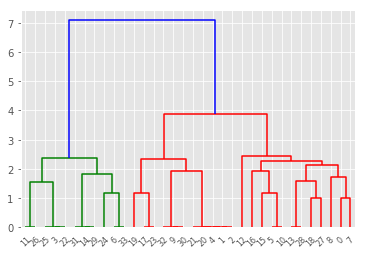

In [11]:
# Функция для построения дендрограммы
dn = dendrogram(link)

Алгоритм подкрасил в дендрограмме два кластера, но здесь скорее кластера всё-таки три. Теперь хочется посмотреть, какими характеристиками различаются наши кластеры.

Сначала добавим к данным колонку ```cluster```, в которую запишем номер кластера, в которую попал объект. Это сделаем с помощью функции ```fcluster```. В качестве первого аргумента передаём объект ```linkage```, полученный выше. Третьим аргументом ```criterion``` передаём критерий для разбиения на кластеры (```distance``` для остановки разбиения по расстоянию между кластерами и ```maxclust``` для разбиения по заданному числу кластеров). Вторым же аргументом является либо пороговое значение для расстояния между кластерами, либо количество кластеров, в зависимости от аргумента ```criterion```.

In [12]:
# Останавливаем объединение, если расстояние между кластерами превышает 3
df['cluster'] = fcluster(link, 3, criterion='distance')

Теперь вычислим средние значения всех характеристик, сгруппировав данные по номеру кластера. Используем стандартную конструкцию: вызов метода ```groupby``` с последующим применением группирующей функции.

In [13]:
df.groupby('cluster').mean()

,COKE,D_COKE,D_PEPSI,D_7UP,PEPSI,SPRITE,TAB,SEVENUP
cluster,,,,,,,,
1,0.00,1.000000,0.545455,0.545455,0.000000,0.000000,0.909091,0.000000
2,1.00,0.272727,0.090909,0.000000,1.000000,0.000000,0.000000,0.272727
3,0.75,0.250000,0.083333,0.083333,0.416667,0.916667,0.083333,0.500000


Также интересно узнать, сколько наблюдений попало в каждый кластер. Для этого также применяем вызов ```groupy``` с последующим применением метода ```size```.

In [14]:
df.groupby('cluster').size()

cluster
1    11
2    11
3    12
dtype: int64

**Каменистая осыпь**

А можно было выбрать число кластеров не на глаз по дендрограмме, а автоматически, тем более если данных много? Можно. Построим график, носящий название "каменистая осыпь". Напомним, в матрице ```link``` во второй колонке хранятся расстояния между парами слитых кластеров. По построению, строки матрицы упорядочены по этой колонке.

In [16]:
dist = link[:, 2]
dist

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        1.        ,  1.        ,  1.15470054,  1.15470054,  1.15470054,
        1.54919334,  1.58113883,  1.73205081,  1.82574186,  1.91485422,
        1.93649167,  2.12132034,  2.27636073,  2.33711814,  2.37920282,
        2.446395  ,  3.87646865,  7.09212963])

Таким образом, можно построить график зависимости расстояний между кластерами от шага слияния (обратного), и посмотреть, начиная с какого момента это расстояние перестанет значительно меняться.

Text(22,2.6,'4 clusters')

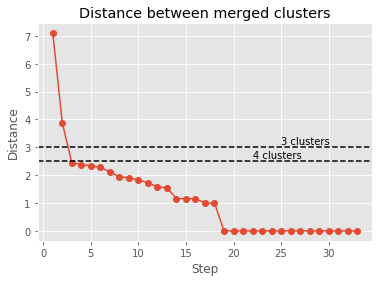

In [17]:
dist_rev = dist[::-1]
idxs = range(1, len(dist) + 1)
plt.plot(idxs, dist_rev, marker='o')
plt.title('Distance between merged clusters')
plt.xlabel('Step')
plt.ylabel('Distance')
plt.axhline(3, c='k', linestyle='dashed')
plt.axhline(2.52, c='k', linestyle='dashed')
plt.text(25, 3.1, '3 clusters')
plt.text(22, 2.6, '4 clusters')

Из картинки видно, что если мы остановимся объединять кластеры при расстоянии равном примерно 2.5, мы получим 4 кластера, а при равном 3 -- 3 кластера.

Однако строго говоря, этот способ всё ещё немасштабируем для больших данных. Но его можно просто поправить, включая в график не все подряд слияния, а только несколько последних. И если уж мы совсем хотим автомаизировать процесс, то факт сильного изменения расстояний между кластерами можно фиксировать с помощью производной: там где график выходит на горизонталь, производная станет почти нулём.

Пример 2. Кластеризация претендентов.
----------------------

In [24]:
# os.chdir("c:/aaa/temp_py/Shad_Python_02_2/2_pretendent")

In [25]:
df = pd.read_csv('assess.dat', sep='\t', index_col='NAME')
df.head()

,NR,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10
NAME,,,,,,,,,,,
Volker,1,10,10,9,10,10,10,9,10,10,9
Sigrid,2,10,10,4,10,5,5,4,5,4,3
Elmar,3,5,4,10,5,10,4,10,5,3,10
Peter,4,10,10,9,10,10,10,9,10,10,9
Otto,5,4,3,5,4,3,10,4,10,10,5


In [26]:
# В колонке NR находится номер объекта, его нужно исключить из данных для кластеризации
del df['NR']

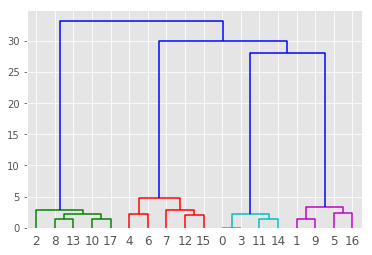

In [27]:
link = linkage(df, 'ward', 'euclidean')
dn = dendrogram(link)

In [28]:
df['cluster'] = fcluster(link, 4, criterion='maxclust')

In [29]:
df.groupby('cluster').mean()

,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10
cluster,,,,,,,,,,
1,4.2,4.8,10.00,4.4,10.00,4.4,10.00,4.00,3.80,10.00
2,4.8,4.4,4.00,4.0,4.20,10.0,4.40,10.00,10.00,5.00
3,10.0,10.0,9.00,10.0,10.00,9.5,9.25,9.75,10.00,9.50
4,10.0,10.0,4.25,10.0,4.75,4.5,3.75,4.25,4.25,4.25


Пример 3. Потребление протеинов в Европе.
------------------

In [30]:
# os.chdir("c:/aaa/temp_py/Shad_Python_02_2/3_Protein Consumption in Europe")

In [31]:
df = pd.read_csv('Protein Consumption in Europe.csv', sep=';', decimal=',', index_col='Country')
df.head()

,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr&Veg
Country,,,,,,,,,
Albania,10.1,1.4,0.5,8.9,0.2,42.3,0.6,5.5,1.7
Austria,8.9,14.0,4.3,19.9,2.1,28.0,3.6,1.3,4.3
Belgium,13.5,9.3,4.1,17.5,4.5,26.6,5.7,2.1,4.0
Bulgaria,7.8,6.0,1.6,8.3,1.2,56.7,1.1,3.7,4.2
Czechoslovakia,9.7,11.4,2.8,12.5,2.0,34.3,5.0,1.1,4.0


Стандартизация данных
--------------------
В этом примере данные, которые мы собираемся кластеризовать, хотя и находятся в одних и тех же единицах измерения, но местами они различаются почти на два порядка, так что будет не лишним их стандартизировать перед анализом. 

В модуле preprocessing библиотеки sklearn реализованы несколько классов стандартизации данных:
* StandardScaler -- приведение к нулевому среднему и единичной дисперсии.
* MinMaxScaler -- приведение данных к отрезку [0, 1].
* MaxAbsScaler -- приведение к [-1, 1] (рекомендуется для разреженных данных).

Замечание. У этих методов есть чуть более лёгкие методы-аналоги ```scale```, ```minmax_scale``` и ```maxabs_scale```, которые делают практически то же самое, но для supervized задач машинного обучения, которые встретяся позже, удобнее использовать именно изначально указанные классы.

Процесс стандартизации выглядит так:

In [32]:
from sklearn import preprocessing

# Выбираем один из вариантов нормализации

norm = preprocessing.StandardScaler()
# norm = preprocessing.MaxAbsScaler()
# norm = preprocessing.MinMaxScaler()

# вычисляем параметры нормализации (они будут сохранены внутри объекта norm)
norm.fit(df)
# преобразовываем данные с параметрами
X = norm.transform(df)
# Полученный на предыдущем шаге объект X -- это матрица класса numpy.ndarray.
# Глазами на неё смотреть неудобно, лучше преобразовать её в объект класса pandas.DataFrame.
X = pd.DataFrame(X, index=df.index, columns=df.columns)

In [33]:
X.head()

,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr&Veg
Country,,,,,,,,,
Albania,0.082941,-1.794750,-2.224584,-1.179570,-1.225033,0.934804,-2.295965,1.247968,-1.378251
Austria,-0.282974,1.686446,1.245621,0.400468,-0.655111,-0.395051,-0.422218,-0.910790,0.092789
Belgium,1.119699,0.387905,1.062979,0.055732,0.064791,-0.525246,0.889405,-0.499598,-0.076947
Bulgaria,-0.618396,-0.523837,-1.220051,-1.265754,-0.925074,2.273959,-1.983674,0.322786,0.036210
Czechoslovakia,-0.039031,0.968104,-0.124197,-0.662467,-0.685107,0.190830,0.452198,-1.013588,-0.076947


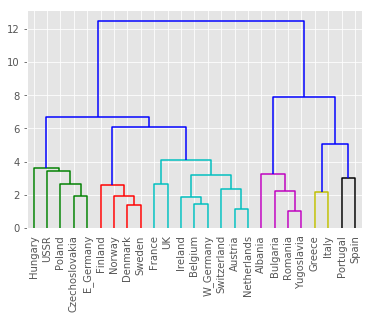

In [34]:
link = linkage(X, 'ward', 'euclidean')
dn = dendrogram(link,
                # массив с названиями объектов для подписи по оси X
                labels=X.index.tolist(),
                # опция для более красивого отображения слишком ветввистой дендрограммы
                truncate_mode='lastp',
                # повернуть подписи вертикально
                color_threshold=5,
                leaf_rotation=90.)

In [35]:
df['cluster'] = fcluster(link, 5, criterion='distance')

In [36]:
df.groupby('cluster').mean()

,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr&Veg
cluster,,,,,,,,,
1,7.9200,10.0400,2.8400,13.8400,2.740,35.740,5.56,2.5400,4.260
2,9.8500,7.0500,3.1500,26.6750,8.225,22.675,4.55,1.1750,2.125
3,13.2125,10.6375,3.9875,21.1625,3.375,24.700,4.65,2.0625,4.175
4,7.1250,4.6750,1.2000,9.4500,0.750,51.125,1.95,5.0500,2.975
5,9.6000,4.0500,2.8500,15.6500,4.650,39.250,2.15,6.0500,6.600
6,6.6500,3.5500,2.1000,6.7500,10.600,28.100,5.80,5.3000,7.550
